# Data Generation pipeline

Load the csv file

In [1]:
pathCSV = "/Users/zein/Downloads/File merged.xlsx"

In [2]:
import pandas as pd
df = pd.read_excel (pathCSV)
df

,user_id,name,hours,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,151603712,Fallout 4,87.0,"Bethesda Game Studios, the award-winning creat...","Mostly Positive,(90,387),- 70% of the 90,387 u...","Nov 9, 2015",Bethesda Game Studios,"Bethesda Softworks,Bethesda Softworks","Open World,Post-apocalyptic,Exploration,Single...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",84.0,RPG,"About This Game Bethesda Game Studios, the aw...",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,$14.99
1,87445402,Fallout 4,83.0,"Bethesda Game Studios, the award-winning creat...","Mostly Positive,(90,387),- 70% of the 90,387 u...","Nov 9, 2015",Bethesda Game Studios,"Bethesda Softworks,Bethesda Softworks","Open World,Post-apocalyptic,Exploration,Single...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",84.0,RPG,"About This Game Bethesda Game Studios, the aw...",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,$14.99
2,25096601,Fallout 4,1.6,"Bethesda Game Studios, the award-winning creat...","Mostly Positive,(90,387),- 70% of the 90,387 u...","Nov 9, 2015",Bethesda Game Studios,"Bethesda Softworks,Bethesda Softworks","Open World,Post-apocalyptic,Exploration,Single...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",84.0,RPG,"About This Game Bethesda Game Studios, the aw...",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,$14.99
3,211925330,Fallout 4,133.0,"Bethesda Game Studios, the award-winning creat...","Mostly Positive,(90,387),- 70% of the 90,387 u...","Nov 9, 2015",Bethesda Game Studios,"Bethesda Softworks,Bethesda Softworks","Open World,Post-apocalyptic,Exploration,Single...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",84.0,RPG,"About This Game Bethesda Game Studios, the aw...",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,$14.99
4,115396529,Fallout 4,17.9,"Bethesda Game Studios, the award-winning creat...","Mostly Positive,(90,387),- 70% of the 90,387 u...","Nov 9, 2015",Bethesda Game Studios,"Bethesda Softworks,Bethesda Softworks","Open World,Post-apocalyptic,Exploration,Single...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",84.0,RPG,"About This Game Bethesda Game Studios, the aw...",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,$14.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,154230723,Khet 2.0,1.9,Officially licensed version of the “Mensa Sele...,"Very Positive,(79),- 92% of the 79 user review...","Oct 1, 2014",BlueLine Games,"BlueLine Games,BlueLine Games","Strategy,Casual,Indie,Board Game,Singleplayer,...","Single-player,Multi-player,Cross-Platform Mult...","English,Russian,Spanish - Spain,Turkish,Czech,...",54.0,"Casual,Indie,Strategy",About This Game Officially licensed version o...,NaN,"Minimum:,OS:,Windows XP or better,Processor:,1...","Recommended:,OS:,Windows XP or better,Processo...",$9.99,NaN
36253,116564064,SAMURAI WARRIORS 4-II,2.2,"The latest iteration of the 10th anniversary ""...","Mostly Positive,(860),- 77% of the 860 user re...","Sep 29, 2015","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...","Action,Hack and Slash,Historical,Character Cus...","Single-player,Multi-player,Co-op,Steam Achieve...","English,Japanese",54.0,Action,About This Game The last title rel

In [3]:
# pip install openpyxl
from scipy.stats import zscore
import numpy as np

# For User vs Game

In [4]:
x = df['user_id']
y = df['hours']

In [5]:
data = {'user' : x, 'hours' : y}
new = pd.DataFrame(data)
new = new.sort_values(by=['hours'])
new

,user,hours
11808,10253354,0.1
33959,162081645,0.1
25275,58905429,0.1
19287,212806127,0.1
25267,258531019,0.1
...,...,...
7587,121199670,6753.0
8955,52567955,6964.0
8514,130882834,7765.0
3562,153382649,9640.0


In [6]:
newY = []
newX = []
for user in x:
    if user in newX:
        pass
    else:
        newX.append(user)
        newY.append(sum((list(new.loc[new['user'] == user]['hours']))))

In [7]:
newData = {'user' : newX, 'hours' : newY}
newd = pd.DataFrame(newData)
newd = newd.sort_values(by=['hours'], ascending = False)
newd

,user,hours
557,100630947,10445.7
2734,153382649,9640.0
6305,130882834,7765.0
2708,52567955,7704.8
616,121199670,6755.2
...,...,...
5756,284604128,0.1
6463,133231400,0.1
8808,238012371,0.1
5033,144307381,0.1


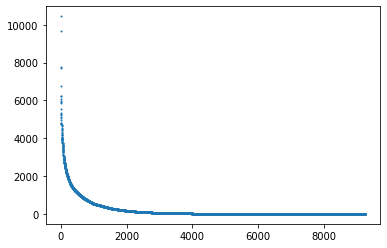

In [8]:
import matplotlib.pyplot as plt
plt.scatter(range(0,9254),newd["hours"],s=1)

## Remove Outliers

In [9]:
z_scores = zscore(newd)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = newd[filtered_entries]
new_df

,user,hours
1368,156879739,1967.5
117,122956129,1957.5
1487,141773234,1952.8
876,80511960,1950.9
168,11373749,1947.4
...,...,...
5756,284604128,0.1
6463,133231400,0.1
8808,238012371,0.1
5033,144307381,0.1


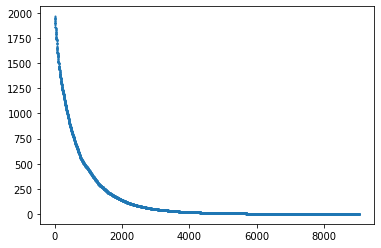

In [10]:
import matplotlib.pyplot as plt
plt.scatter(range(0,9046),new_df["hours"],s=1)

# For Game vs Hours

In [11]:
x = df['name']
y = df['hours']

data = {'game' : x, 'hours' : y}
new = pd.DataFrame(data)
new = new.sort_values(by=['hours'])
new

,game,hours
11808,Far Cry 3,0.1
33959,Wild Warfare,0.1
25275,Clicker Heroes,0.1
19287,Super Meat Boy,0.1
25267,Clicker Heroes,0.1
...,...,...
7587,Dota 2,6753.0
8955,Dota 2,6964.0
8514,Dota 2,7765.0
3562,Team Fortress 2,9640.0


In [12]:
newY = []
newX = []
for user in x:
    if user in newX:
        pass
    else:
        newX.append(user)
        newY.append(sum((list(new.loc[new['game'] == user]['hours']))))

In [13]:
newData = {'game' : newX, 'hours' : newY}
newd = pd.DataFrame(newData)
newd = newd.sort_values(by=['hours'], ascending = False)
newd

,game,hours
13,Dota 2,981684.6
6,Team Fortress 2,173673.3
137,Counter-Strike,134261.1
15,Garry's Mod,49725.3
1,Left 4 Dead 2,33596.7
...,...,...
1355,Tiamat X,0.1
435,Epic Cards Battle(TCG),0.1
1226,Space Warp,0.1
446,A-Train 8,0.1


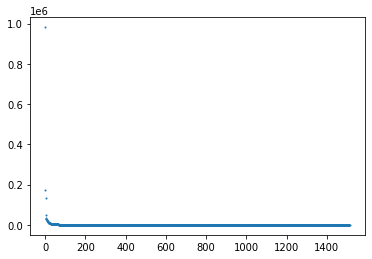

In [14]:
import matplotlib.pyplot as plt
plt.scatter(range(0,1515),newd["hours"],s=1)

## Remove Outliers

In [15]:
z_scores = zscore(newd['hours'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df = newd[filtered_entries]
new_df

,game,hours
15,Garry's Mod,49725.3
1,Left 4 Dead 2,33596.7
171,Terraria,29951.8
226,Warframe,27074.6
230,Arma 3,24055.7
...,...,...
1355,Tiamat X,0.1
435,Epic Cards Battle(TCG),0.1
1226,Space Warp,0.1
446,A-Train 8,0.1


1512


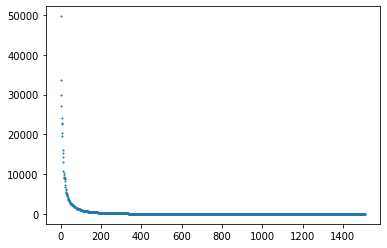

In [16]:
import matplotlib.pyplot as plt
print(len(new_df["hours"]))
plt.scatter(range(0,1512),new_df["hours"],s=1)

In [17]:
z_scores = zscore(new_df['hours'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df = new_df[filtered_entries]
new_df

,game,hours
229,Euro Truck Simulator 2,7226.9
159,Torchlight II,6891.9
239,PlanetSide 2,6239.7
140,AdVenture Capitalist,6067.7
68,The Binding of Isaac,5458.1
...,...,...
1355,Tiamat X,0.1
435,Epic Cards Battle(TCG),0.1
1226,Space Warp,0.1
446,A-Train 8,0.1


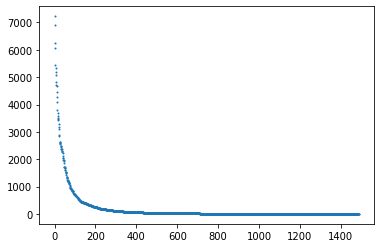

In [18]:
import matplotlib.pyplot as plt
plt.scatter(range(0,1490),new_df["hours"],s=1)

In [19]:
new_df

,game,hours
229,Euro Truck Simulator 2,7226.9
159,Torchlight II,6891.9
239,PlanetSide 2,6239.7
140,AdVenture Capitalist,6067.7
68,The Binding of Isaac,5458.1
...,...,...
1355,Tiamat X,0.1
435,Epic Cards Battle(TCG),0.1
1226,Space Warp,0.1
446,A-Train 8,0.1


# Filter outlier games

In [20]:
filteredGames = df[df.name.isin(new_df['game'])]
filteredGames

,user_id,name,hours,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
968,151603712,HuniePop,8.5,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
969,86338111,HuniePop,34.0,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
970,84455820,HuniePop,16.2,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
971,210172601,HuniePop,37.0,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
972,171383863,HuniePop,10.6,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,154230723,Khet 2.0,1.9,Officially licensed version of the “Mensa Sele...,"Very Positive,(79),- 92% of the 79 user review...","Oct 1, 2014",BlueLine Games,"BlueLine Games,BlueLine Games","Strategy,Casual,Indie,Board Game,Singleplayer,...","Single-player,Multi-player,Cross-Platform Mult...","English,Russian,Spanish - Spain,Turkish,Czech,...",54.0,"Casual,Indie,Strategy",About This Game Officially licensed version o...,NaN,"Minimum:,OS:,Windows XP or better,Processor:,1...","Recommended:,OS:,Windows XP or better,Processo...",$9.99,NaN
36253,116564064,SAMURAI WARRIORS 4-II,2.2,"The latest iteration of the 10th anniversary ""...","Mostly Positive,(860),- 77% of the 860 user re...","Sep 29, 2015","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...","Action,Hack and Slash,Historical,Character Cus...","Single-player,Multi-player,Co-op,Steam Achieve...","English,Japanese",54.0,Action,About This Game The last title released for t...,NaN,"Minimum:,OS:,Windows® Vista, Windows® 7, Windo...","Recommended:,OS:,Windows® Vista, Windows® 7, W...",$49.99,NaN
36254,135400225,Life is Hard,3.1,Life is Hard is a godsim town simulator game d...,"Mixed,(252),- 64% of the 252 user reviews for ...","Nov 3, 2015","Pirozhok Studio,Vitaliy Ruzankin","Pirozhok Studio,Pirozhok Studio","Early Access,Early Access,Strategy,Indie,Simul...","Single-player,Steam Achievements,Steam Trading...","English,Russian",31.0,"Adventure,Indie,Simulation,Strategy,Early Acce

### Sort based on outliers

In [21]:
x = filteredGames['user_id']
y = filteredGames['hours']

data = {'user' : x, 'hours' : y}
new = pd.DataFrame(data)
new = new.sort_values(by=['hours'])
new

,user,hours
20162,28229872,0.1
13817,12610800,0.1
16208,36557643,0.1
25348,100311267,0.1
35877,180901075,0.1
...,...,...
25357,38049880,1539.0
35083,14544587,1565.0
28065,109475164,1592.0
28404,14544587,1616.0


### Remove repeated users by finding total sum of hours played

In [22]:
newY = []
newX = []
for user in x:
    if user in newX:
        pass
    else:
        newX.append(user)
        newY.append(sum((list(new.loc[new['user'] == user]['hours']))))

In [23]:
newData = {'user' : newX, 'hours' : newY}
newd = pd.DataFrame(newData)
newd = newd.sort_values(by=['hours'], ascending = False)
newd

,user,hours
1323,14544587,4263.9
1052,8585433,3512.3
1113,17649444,2717.0
353,26762388,2616.7
732,33651880,2037.3
...,...,...
2129,303789257,0.1
1247,63020970,0.1
2681,123325040,0.1
3504,213022303,0.1


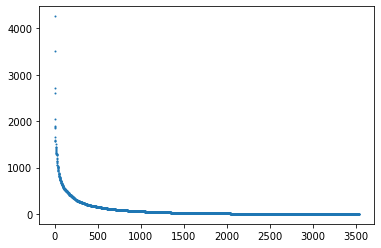

In [24]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3540),newd["hours"],s=1)

## Remove outliers

In [25]:
z_scores = zscore(newd['hours'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df = newd[filtered_entries]
new_df

,user,hours
405,3449240,734.6
152,17530772,728.3
2892,79746085,720.0
1774,175001491,718.9
66,11403772,706.0
...,...,...
2129,303789257,0.1
1247,63020970,0.1
2681,123325040,0.1
3504,213022303,0.1


3472


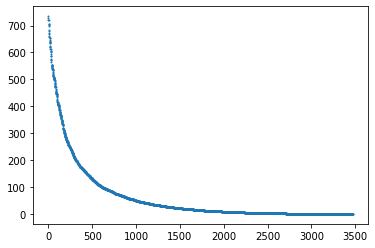

In [26]:
import matplotlib.pyplot as plt
print(len(new_df["hours"]))
plt.scatter(range(0,3472),new_df["hours"],s=1)

# Filter the users from the df to generate final CSV

In [31]:
filteredUsers = filteredGames[filteredGames.user_id.isin(new_df['user'])]
filteredUsers

,user_id,name,hours,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
968,151603712,HuniePop,8.5,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
969,86338111,HuniePop,34.0,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
970,84455820,HuniePop,16.2,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
971,210172601,HuniePop,37.0,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
972,171383863,HuniePop,10.6,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",English,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36249,60859695,Legend of Fae,0.3,Four elementals are drawn to Claudia as she se...,"Very Positive,(81),- 80% of the 81 user review...","Jul 26, 2011",Endlessfluff Games,"Endlessfluff Games,Endlessfluff Games","Indie,Casual,Female Protagonist,Match 3,Puzzle...",Single-player,English,NaN,"Casual,Indie",About This Game Sea Cross Island was a quiet ...,NaN,NaN,NaN,$9.99,NaN
36250,75970863,DinerTown Tycoon,1.0,The evil Grub Burger fast food chain has bribe...,"Mixed,(13),- 61% of the 13 user reviews for th...","Sep 30, 2009",PlayFirst,"PlayFirst,PlayFirst","Casual,Management",Single-player,English,NaN,Simulation,About This Game The evil Grub Burger fast fo...,NaN,"Minimum:,OS:,OS X version Leopard 10.5.8, Snow...","Recommended:,OS:,OS X version Leopard 10.5.8, ...",$9.99,NaN
36251,154230723,The Impossible Game,14.4,"The super-addictive and very, very hard platfo...","Very Positive,(834),- 86% of the 834 user revi...","May 8, 2014",Grip Games,"FlukeDude,FlukeDude","Indie,Great Soundtrack,Difficult,Platformer,Le...","Single-player,Steam Achievements,Full controll...",English,12.0,Indie,"About This Game The super-addictive and very,...",NaN,NaN,NaN,$4.99,NaN
36252,154230723,Khet 2.0,1.9,Officially licensed version of the “Mensa Sele...,"Very Positive,(79),- 92% of the 79 user review...","Oct 1, 2014",BlueLine Games,"BlueLine Games,BlueLine Games","Strategy,Casual,Indie,Board Game,Singleplayer,...","Single-player,Multi-player,Cross-Platform Mult...","English,Russian,

In [32]:
df.to_csv(r'/Users/zein/Desktop/FinalFiltered.csv', index=False) 

# Generate implicit Ratings

In [55]:
def getRating(hoursPlayed, averageHours):

    rating = 0
    if(hoursPlayed>=0.8*averageHours):
        rating = 5
    elif (hoursPlayed>=0.6*averageHours):
        rating = 4
    elif (hoursPlayed>=0.4*averageHours):
        rating = 3
    elif (hoursPlayed>=0.2*averageHours):
        rating = 2
    else:
        rating = 1

    return rating


#Method 1
def calcRatingM1(user, hoursSpentPlayingGame, df):
    #find average of total time the user has played all games
    totalGamesPlayed = df.loc[df['user_id'] == user]["hours"].count()
    hoursSpent = list(df.loc[df['user_id'] == user]["hours"])

    totalHoursSpent = 0
    for x in hoursSpent:
        x = float(x)
        totalHoursSpent +=x

    averageHours = (totalHoursSpent)/(totalGamesPlayed)
    #get the rating
    rating = getRating(hoursSpentPlayingGame, averageHours)
    return rating


#Method 2
def calcRatingM2(game, hoursSpentPlayingGame, df):
    #find average of total time spent by all users playing this specific game 
    totalUsersPlayed = df.loc[df['name'] == game]["user_id"].count()
    hoursSpentOnGame = list(df.loc[df['name'] == game]["hours"])

    totalHoursSpent = 0
    for x in hoursSpentOnGame:
        x = float(x)
        totalHoursSpent +=x

    
    averageHours = (totalHoursSpent)/(totalUsersPlayed)
    #get the rating
    rating = getRating(hoursSpentPlayingGame, averageHours)
    return rating

In [50]:
#Example of finding the rating for a user for a game that they play for 30 hours
#Based on the total amount of the time they spend playing, this game would get a rating of 5/5
calcRatingM1(151603712, 30, filteredUsers)

5

In [52]:
#Example of finding the rating for a user for the game of Fallout
#They play it 30 hours and so the rating is a 3/5
calcRatingM2("Legend of Fae", 30, filteredUsers)

5

Add the ratings to the data frame

In [56]:
df = filteredUsers
count = 0
ratingsM1 = []
ratingsM2 = []
for ind in df.index:
    count +=1

    gameName = df['name'][ind]
    user_id = df['user_id'][ind]
    hours = df['hours'][ind]
    hours = float(hours)


    ratingM1 = calcRatingM1(user_id, hours, df)
    ratingM2 = calcRatingM2(gameName, hours, df)

    ratingsM1.append(ratingM1)
    ratingsM2.append(ratingM2)

df['Rating M1'] = ratingsM1
df['Rating M2'] = ratingsM2
df

/var/folders/yk/j071n21n4hx934n3wqzwtsyh0000gn/T/ipykernel_37137/183944574.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating M1'] = ratingsM1
/var/folders/yk/j071n21n4hx934n3wqzwtsyh0000gn/T/ipykernel_37137/183944574.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating M2'] = ratingsM2


,user_id,name,hours,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,...,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,Rating M1,Rating M2
968,151603712,HuniePop,8.5,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",...,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN,5,3
969,86338111,HuniePop,34.0,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",...,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN,5,5
970,84455820,HuniePop,16.2,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",...,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN,5,4
971,210172601,HuniePop,37.0,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",...,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN,5,5
972,171383863,HuniePop,10.6,"HuniePop is a unique sim experience for PC, Ma...","Overwhelmingly Positive,(14,373),- 96% of the ...","Jan 19, 2015",HuniePot,"HuniePot,HuniePot","Nudity,Mature,Anime,Sexual Content,Dating Sim,...","Single-player,Steam Achievements,Steam Trading...",...,20.0,"Indie,RPG,Simulation,Strategy",About This Game HuniePop is a unique sim expe...,Mature Content Description The developers de...,NaN,NaN,$9.99,NaN,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36249,60859695,Legend of Fae,0.3,Four elementals are drawn to Claudia as she se...,"Very Positive,(81),- 80% of the 81 user review...","Jul 26, 2011",Endlessfluff Games,"Endlessfluff Games,Endlessfluff Games","Indie,Casual,Female Protagonist,Match 3,Puzzle...",Single-player,...,NaN,"Casual,Indie",About This Game Sea Cross Island was a quiet ...,NaN,NaN,NaN,$9.99,NaN,1,5
36250,75970863,DinerTown Tycoon,1.0,The evil Grub Burger fast food chain has bribe...,"Mixed,(13),- 61% of the 13 user reviews for th...","Sep 30, 2009",PlayFirst,"PlayFirst,PlayFirst","Casual,Management",Single-player,...,NaN,Simulation,About This Game The evil Grub Burger fast fo...,NaN,"Minimum:,OS:,OS X version Leopard 10.5.8, Snow...","Recommended:,OS:,OS X version Leopard 10.5.8, ...",$9.99,NaN,1,5
36251,154230723,The Impossible Game,14.4,"The super-addictive and very, very hard platfo...","Very Positive,(834),- 86% of the 834 user revi...","May 8, 2014",Grip Games,"FlukeDude,FlukeDude","Indie,Great Soundtrack,Difficult,Platformer,Le...","Single-player,Steam Achievements,Full controll...",...,12.0,Indie,"About This Game The super-addictive and very,...",NaN,NaN,NaN,$4.99,NaN,5,5
36252,154230723,Khet 2.0,1.9,Officially licensed version of the “Mensa Sele...,"Very Positive,(79),- 92% of the 79 user review...","Oct 1, 2014",BlueLine Games,"BlueLine Games,BlueLine Games","Strategy,Casual,Indie,Board Game,Singleplayer,...","Single-player,Multi-player,Cross-Platform Mult

In [57]:
df.to_csv(r'/Users/zein/Desktop/FinalWithRatings.csv', index=False) 